In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error,  median_absolute_error, r2_score 
%matplotlib inline 
sns.set(style="whitegrid")

# Загрузка и первичный анализ набора данных
Для лабораторной работы будем использовать набор данных о [медицинской страховке](https://www.kaggle.com/mirichoi0218/insurance).
<a id='data_desc'></a> 

<b>Задача регрессии</b> состоит в предсказании платы за медицинское обслуживание на основании других параметров.

Колонки:

1. `age` - возраст
2. `sex` -  пол
3. `bmi` - индекс массы тела
4. `children` - кол-во детей
5. `smoker` - курит/не курит
6. `region` - регион проживания в США
7. `charges` - плата за мед. обслуживание

In [83]:
data = pd.read_csv('../data/insurance.csv', sep = ',')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [84]:
# Размер набора данных (строки, колонки)
data.shape

(1338, 7)

In [85]:
# Типы данных в колонках
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

### Проверка на наличие пропущенных значений

In [86]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Пропущенные значения не найдены.

### Основные статистические показатели для каждого параметра

In [87]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Преобразуем категориальные признаки в числовые:

In [88]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#пол
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)
#курение
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)
#регион
le.fit(data.region.drop_duplicates()) 
data.region = le.transform(data.region)

In [89]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# Разделение выборки на тестовую и обучающую

Подключим необходимый метод из библиотек sklearn.

In [90]:
from sklearn.model_selection import train_test_split

Разделим выборку на входные и выходные данные:

In [91]:
X = data.drop(['charges'], axis = 1)
Y = data.charges
print('Входные данные:\n\n', X.head(), '\n\nВыходные данные:\n\n', Y.head())

Входные данные:

    age  sex     bmi  children  smoker  region
0   19    0  27.900         0       1       3
1   18    1  33.770         1       0       2
2   28    1  33.000         3       0       2
3   33    1  22.705         0       0       1
4   32    1  28.880         0       0       1 

Выходные данные:

 0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64


Наконец, разделим выборку на обучающую и тестовую.

In [92]:
X_train,  X_test,  Y_train,  Y_test = train_test_split(X,  Y, random_state = 0)

In [93]:
print('Входные параметры обучающей выборки:\n\n',X_train.head(), \
      '\n\nВходные параметры тестовой выборки:\n\n', X_test.head(), \
      '\n\nВыходные параметры обучающей выборки:\n\n', Y_train.head(), \
      '\n\nВыходные параметры тестовой выборки:\n\n', Y_test.head())

Входные параметры обучающей выборки:

       age  sex    bmi  children  smoker  region
1075   32    0  29.59         1       0       2
131    61    0  22.04         0       0       0
15     19    1  24.60         1       0       3
1223   20    0  24.42         0       1       2
1137   26    0  22.23         0       0       1 

Входные параметры тестовой выборки:

       age  sex     bmi  children  smoker  region
578    52    1  30.200         1       0       3
610    47    0  29.370         1       0       2
569    48    1  40.565         2       1       1
1034   61    1  38.380         0       0       1
198    51    0  18.050         0       0       1 

Выходные параметры обучающей выборки:

 1075     4562.84210
131     13616.35860
15       1837.23700
1223    26125.67477
1137     3176.28770
Name: charges, dtype: float64 

Выходные параметры тестовой выборки:

 578      9724.53000
610      8547.69130
569     45702.02235
1034    12950.07120
198      9644.25250
Name: charges, dtype: floa

Проверим правильность разделения выборки на тестовую и обучающую. Посмотрим на размеры матриц.

In [94]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1003, 6)
(335, 6)
(1003,)
(335,)


# Случайный лес

Построим случайный лес из 5 деревьев.

In [95]:
from sklearn.ensemble import RandomForestRegressor

tree1 = RandomForestRegressor(n_estimators=5, oob_score=True, random_state=10)
tree1.fit(X, Y)

C:\Users\volko\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:737: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
                      oob_score=True, random_state=10, verbose=0,
                      warm_start=False)

In [96]:
Y_predict = tree1.predict(X_test)
print('Средняя абсолютная ошибка:',mean_absolute_error(Y_test, Y_predict))
print('Средняя квадратичная ошибка:',mean_squared_error(Y_test, Y_predict))
print('Median absolute error:',median_absolute_error(Y_test, Y_predict))
print('Коэффициент детерминации:',r2_score(Y_test, Y_predict))

Средняя абсолютная ошибка: 1095.6634543490547
Средняя квадратичная ошибка: 5374005.303428832
Median absolute error: 166.61947999999938
Коэффициент детерминации: 0.9658651384110751


Коэффициент детерминации оцень хороший. Оценки ошибок все же оставляют желать лучшего.

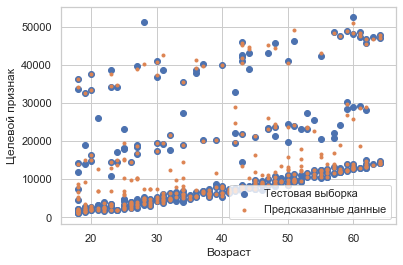

In [97]:
plt.scatter(X_test.age, Y_test, marker = 'o', label = 'Тестовая выборка')
plt.scatter(X_test.age, Y_predict, marker = '.', label = 'Предсказанные данные')
plt.legend(loc = 'lower right')
plt.xlabel('Возраст')
plt.ylabel('Целевой признак')
plt.show()

Сравним показатели с полиномиальным регрессором в методе опорных векторов из пятой лабораторной работы.

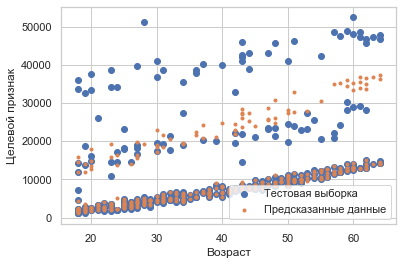

In [98]:
from sklearn.svm import SVR

X1 = data.drop(['charges'], axis = 1)
Y1 = data.charges
X_train, X_test, Y_train, Y_test = train_test_split(X1, Y1, random_state=0)

polySVR = SVR(kernel='poly', degree=2, gamma=0.2, C=1.0)
polySVR.fit(X_train, Y_train)
svr_y_pred = polySVR.predict(X_test)

plt.scatter(X_test.age, Y_test, marker = 'o', label = 'Тестовая выборка')
plt.scatter(X_test.age, svr_y_pred, marker = '.', label = 'Предсказанные данные')
plt.legend(loc = 'lower right')
plt.xlabel('Возраст')
plt.ylabel('Целевой признак')
plt.show()

In [99]:
print('Средняя абсолютная ошибка:',mean_absolute_error(Y_test, svr_y_pred))
print('Средняя квадратичная ошибка:',mean_squared_error(Y_test, svr_y_pred))
print('Median absolute error:',median_absolute_error(Y_test, svr_y_pred))
print('Коэффициент детерминации:',r2_score(Y_test, svr_y_pred))

Средняя абсолютная ошибка: 3149.0234805327673
Средняя квадратичная ошибка: 46508573.89319307
Median absolute error: 152.70253406748088
Коэффициент детерминации: 0.7045846360572994


Видно, что метод случайного леса работает <b>значительно</b> лучше. Помимо улучшения показателей оценок ошибок и коэффициента детерминации это еще заметно и на графике. В методе случайного леса предсказанные данные больше совпадают с тестовой выборкой, учитывается "кучный разброс" данных.

Попробуем найти лучший случайный лес

In [100]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 50, 75, 100],
    'max_features': [0.2, 0.3, 0.4, 0.6, 0.8, 0.9, 1.0],
    'min_samples_leaf': [0.01, 0.04, 0.06, 0.08, 0.1]
}

grid_1 = GridSearchCV(estimator=RandomForestRegressor(oob_score=True, random_state=10),
                    param_grid=params, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
grid_1.fit(X, Y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=True, random_state=10,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_features': [0.2, 0.3, 0.4, 0.6,

In [101]:
print('Лучший показатель средней квадратичной ошибки:',-grid_1.best_score_)
print('Параметры для данного показателя:\n',grid_1.best_params_)

Лучший показатель средней квадратичной ошибки: 20658459.544196565
Параметры для данного показателя:
 {'max_features': 0.9, 'min_samples_leaf': 0.01, 'n_estimators': 75}


In [102]:
tree2 = RandomForestRegressor(n_estimators=75, max_features = 0.9, min_samples_leaf = 0.01, oob_score=True, random_state=10)
tree2.fit(X, Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=0.9, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=0.01, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=75,
                      n_jobs=None, oob_score=True, random_state=10, verbose=0,
                      warm_start=False)

In [103]:
Y_predict2 = tree2.predict(X_test)
print('Средняя абсолютная ошибка:',mean_absolute_error(Y_test, Y_predict2))
print('Средняя квадратичная ошибка:',mean_squared_error(Y_test, Y_predict2))
print('Median absolute error:',median_absolute_error(Y_test, Y_predict2))
print('Коэффициент детерминации:',r2_score(Y_test, Y_predict2))

Средняя абсолютная ошибка: 2146.9373915955116
Средняя квадратичная ошибка: 12385385.504762802
Median absolute error: 1410.684748085012
Коэффициент детерминации: 0.9213299213417582


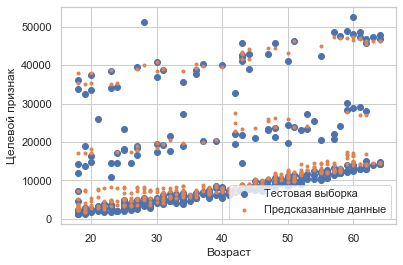

In [104]:
plt.scatter(X_test.age, Y_test, marker = 'o', label = 'Тестовая выборка')
plt.scatter(X_test.age, Y_predict2, marker = '.', label = 'Предсказанные данные')
plt.legend(loc = 'lower right')
plt.xlabel('Возраст')
plt.ylabel('Целевой признак')
plt.show()

Судя по оценкам, точность этого леса действительно улучшилась, но на графике видно, что предсказанные данные больше не совпадают с тестовой выборкой, чем на графике первого леса. То есть нельзя сказать, что данное дерево действительно лучше.

Попробуем убрать из набора параметров мин. кол-во данных в листе `min_samples_leaf` и заново провести кросс-валидацию.

In [105]:
params2 = {
    'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 50, 75, 100],
    'max_features': [0.2, 0.3, 0.4, 0.6, 0.8, 0.9, 1.0]
}

grid_2 = GridSearchCV(estimator=RandomForestRegressor(oob_score=True, random_state=10),
                    param_grid=params2, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
grid_2.fit(X, Y)
print('Лучший показатель средней квадратичной ошибки:',-grid_2.best_score_)
print('Параметры для данного показателя:\n',grid_2.best_params_)

Лучший показатель средней квадратичной ошибки: 23068300.96479446
Параметры для данного показателя:
 {'max_features': 0.6, 'n_estimators': 100}


In [106]:
tree3 = RandomForestRegressor(n_estimators=100, max_features = 0.6, oob_score=True, random_state=10)
tree3.fit(X, Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=0.6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=True, random_state=10, verbose=0,
                      warm_start=False)

In [107]:
Y_predict3 = tree3.predict(X_test)
print('Средняя абсолютная ошибка:',mean_absolute_error(Y_test, Y_predict3))
print('Средняя квадратичная ошибка:',mean_squared_error(Y_test, Y_predict3))
print('Median absolute error:',median_absolute_error(Y_test, Y_predict3))
print('Коэффициент детерминации:',r2_score(Y_test, Y_predict3))

Средняя абсолютная ошибка: 887.9995235699863
Средняя квадратичная ошибка: 2434563.3416265496
Median absolute error: 437.80759429999944
Коэффициент детерминации: 0.9845360251797911


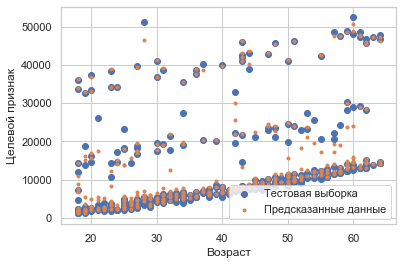

In [108]:
plt.scatter(X_test.age, Y_test, marker = 'o', label = 'Тестовая выборка')
plt.scatter(X_test.age, Y_predict3, marker = '.', label = 'Предсказанные данные')
plt.legend(loc = 'lower right')
plt.xlabel('Возраст')
plt.ylabel('Целевой признак')
plt.show()

Показатели точности еще лучше, и на графике видно хорошее совпадение тестовой выборки и предсказанных данных, хотя при возрасте от 50 до 60 заметно значительное расхождение в данных.

# Градиентный бустинг

Построим ансамбль из 5 моделей

In [109]:
from sklearn.ensemble import GradientBoostingRegressor

grad = GradientBoostingRegressor(n_estimators=5, random_state = 10)
grad.fit(X_train, Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=5,
                          n_iter_no_change=None, presort='auto',
                          random_state=10, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [110]:
Y_grad_pred = grad.predict(X_test)
print('Средняя абсолютная ошибка:',mean_absolute_error(Y_test, Y_grad_pred))
print('Средняя квадратичная ошибка:',mean_squared_error(Y_test, Y_grad_pred))
print('Median absolute error:',median_absolute_error(Y_test, Y_grad_pred))
print('Коэффициент детерминации:',r2_score(Y_test, Y_grad_pred))

Средняя абсолютная ошибка: 6237.423903812472
Средняя квадратичная ошибка: 65283061.76832604
Median absolute error: 5067.817331876842
Коэффициент детерминации: 0.5853319541495026


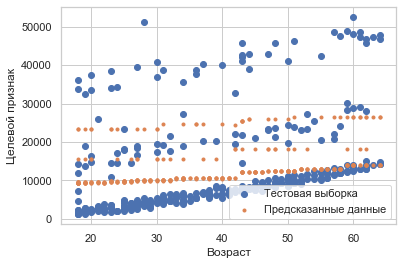

In [111]:
plt.scatter(X_test.age, Y_test, marker = 'o', label = 'Тестовая выборка')
plt.scatter(X_test.age, Y_grad_pred, marker = '.', label = 'Предсказанные данные')
plt.legend(loc = 'lower right')
plt.xlabel('Возраст')
plt.ylabel('Целевой признак')
plt.show()

Без подбора гиперпараметров ансамбль работает намного хуже, чем случайный лес.

Применим кросс-валидацию.

In [112]:
params = {
    'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 50, 75, 100],
    'max_features': [0.2, 0.3, 0.4, 0.6, 0.8, 0.9, 1.0],
    'min_samples_leaf': [0.01, 0.04, 0.06, 0.08, 0.1]
}

grid_gr = GridSearchCV(estimator=GradientBoostingRegressor(random_state=10),
                    param_grid=params, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
grid_gr.fit(X, Y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter...
                             

In [113]:
print('Лучший показатель средней квадратичной ошибки:',-grid_gr.best_score_)
print('Параметры для данного показателя:\n',grid_gr.best_params_)

Лучший показатель средней квадратичной ошибки: 20349467.277887657
Параметры для данного показателя:
 {'max_features': 1.0, 'min_samples_leaf': 0.04, 'n_estimators': 50}


Построим ансамбль по найденным лучшим параметрам:

In [114]:
grad1 = GradientBoostingRegressor(n_estimators=50, max_features = 1.0, 
                                 min_samples_leaf = 0.04, random_state = 10)
grad1.fit(X_train, Y_train)
Y_grad_pred1 = grad1.predict(X_test)
print('Средняя абсолютная ошибка:',mean_absolute_error(Y_test, Y_grad_pred1))
print('Средняя квадратичная ошибка:',mean_squared_error(Y_test, Y_grad_pred1))
print('Median absolute error:',median_absolute_error(Y_test, Y_grad_pred1))
print('Коэффициент детерминации:',r2_score(Y_test, Y_grad_pred1))

Средняя абсолютная ошибка: 2489.7851352978873
Средняя квадратичная ошибка: 15250659.2631103
Median absolute error: 1833.2754693185348
Коэффициент детерминации: 0.9031301396829707


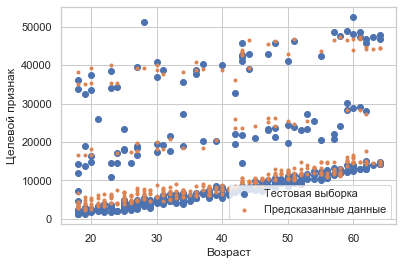

In [115]:
plt.scatter(X_test.age, Y_test, marker = 'o', label = 'Тестовая выборка')
plt.scatter(X_test.age, Y_grad_pred1, marker = '.', label = 'Предсказанные данные')
plt.legend(loc = 'lower right')
plt.xlabel('Возраст')
plt.ylabel('Целевой признак')
plt.show()

Показатели действительно значительно улучшились. Однако заметно расхождение между предсказанными данными и тестовой выборкой.

Попробуем провести кросс-валидацию без учета `min_samples_leaf`.

In [116]:
params1 = {
    'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 50, 75, 100],
    'max_features': [0.2, 0.3, 0.4, 0.6, 0.8, 0.9, 1.0]
}

grid_gr1 = GridSearchCV(estimator=GradientBoostingRegressor(random_state=10),
                    param_grid=params1, scoring='neg_mean_squared_error', cv=3, n_jobs=-1)
grid_gr1.fit(X, Y)
print('Лучший показатель средней квадратичной ошибки:',-grid_gr1.best_score_)
print('Параметры для данного показателя:\n',grid_gr1.best_params_)

Лучший показатель средней квадратичной ошибки: 20517355.12930149
Параметры для данного показателя:
 {'max_features': 0.9, 'n_estimators': 50}


In [117]:
grad2 = GradientBoostingRegressor(n_estimators=50, max_features = 0.9,
                                  random_state = 10)
grad2.fit(X_train, Y_train)
Y_grad_pred2 = grad2.predict(X_test)
print('Средняя абсолютная ошибка:',mean_absolute_error(Y_test, Y_grad_pred2))
print('Средняя квадратичная ошибка:',mean_squared_error(Y_test, Y_grad_pred2))
print('Median absolute error:',median_absolute_error(Y_test, Y_grad_pred2))
print('Коэффициент детерминации:',r2_score(Y_test, Y_grad_pred2))

Средняя абсолютная ошибка: 2470.7720837116653
Средняя квадратичная ошибка: 15459011.127629893
Median absolute error: 1750.6903244693658
Коэффициент детерминации: 0.9018067204350156


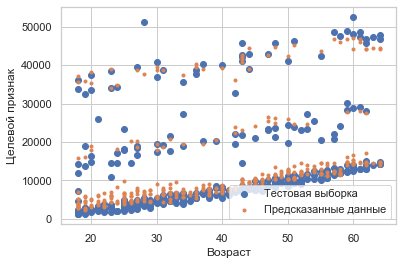

In [118]:
plt.scatter(X_test.age, Y_test, marker = 'o', label = 'Тестовая выборка')
plt.scatter(X_test.age, Y_grad_pred2, marker = '.', label = 'Предсказанные данные')
plt.legend(loc = 'lower right')
plt.xlabel('Возраст')
plt.ylabel('Целевой признак')
plt.show()

Новый ансамбль ведет себя практически так же.

# Выводы

Лучше себя показал метод случайного леса. Показатель детерминации достигнул 0.98. Оценки ошибок все равно оставались не очень хорошими, но на графике было видно хорошее качество обучения.